### CUSTOMER CHURN PREDICTION FOR A TELECOMM

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from its path.
df = pd.read_csv("../Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# First five rows of the dataset 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape # This dataset has 7,043 rows and 21 columns

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### WORKFLOWS

* Data Cleaning
* Split Dataset into training and test set
* Data Preprocessing
* Train Model

### Data Cleaning

In [6]:
df.isna().sum() # This shows that there are no missing values in this dataset but i will like to investigate it.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check for the columns with whitespaces
for i in df:
    if " " in df[i].values:
        print(i)

TotalCharges


* Investigate the `TotalCharges` column to see if the whitespaces could be filled with the help of another column like `MonthlyCharges` and `Tenure`

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


* The whitespaces can't be filled with the assistance of any existing features in this dataset so i will changing them to `NAN`accordingly.

In [9]:
#check for missing values again
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.replace(" ", np.nan,inplace=True)

In [11]:
df.replace("", np.nan,inplace=True)

In [12]:
#fill the missing values with zero.
df["TotalCharges"].fillna(0,inplace=True)

In [13]:
#Cross-checking the missing values again to see if it has been filled
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Casting features into appropriate data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Noticed that `TotalCharges` should be in float but it is object then i will have to change this to float

In [15]:
df["TotalCharges"]= df["TotalCharges"].astype(float)

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Taking a closer look at the binary features

In [17]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
df.nunique()[df.nunique() == 3]

MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
dtype: int64

In [19]:
df[["OnlineBackup", "DeviceProtection"]].apply(pd.value_counts)

,OnlineBackup,DeviceProtection
No,3088,3095
Yes,2429,2422
No internet service,1526,1526


In [20]:
df.nunique()[df.nunique() == 3].keys()

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract'],
      dtype='object')

In [21]:
df[df.nunique()[df.nunique() == 3].keys()].apply(pd.value_counts)

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
DSL,NaN,2421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month-to-month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3875.0
No,3390.0,1526.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,NaN
No internet service,NaN,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0,NaN
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
One year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473.0
Two year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1695.0
Yes,2971.0,NaN,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,NaN


In [22]:
cat_col = ["InternetService", "Contract"]

In [23]:
[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [24]:
df[[col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]].apply(pd.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0
No internet service,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [25]:
to_bool = [col for col in df.nunique()[df.nunique() == 3].keys() if col not in cat_col]

In [26]:
# Replace the features with Boolean with the value of  1,0
df[to_bool] = np.where(df[to_bool] == "Yes", 1, 0)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [29]:
id_col = ["customerID"]
target_col = ["Churn"]
cat_cols = [col for col in df.nunique()[df.nunique() < 5].keys() if col not in target_col]
num_col = [col for col in df.columns if col not in id_col + target_col + cat_cols]
bool_col = [col for col in df.nunique()[df.nunique() == 2].keys() if col not in target_col]

### Split dataset into training and test¶


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_test_split(df, test_size=.2, random_state=7)

[      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 2338  4277-BWBML    Male              0     Yes        Yes      72   
 4705  5760-FXFVO    Male              0      No         No       6   
 3514  6993-YCOBK    Male              0     Yes        Yes      60   
 1549  4237-RLAQD    Male              0      No         No       1   
 5757  5539-HIVAK  Female              1     Yes         No      28   
 ...          ...     ...            ...     ...        ...     ...   
 5699  6719-OXYBR    Male              0      No         No      15   
 2550  8129-GMVGI  Female              0     Yes        Yes      56   
 537   5844-QVTAT  Female              0     Yes        Yes      33   
 1220  0872-JCPIB    Male              0      No         No      17   
 4271  2819-GWENI  Female              0     Yes        Yes      28   
 
      PhoneService  MultipleLines InternetService  OnlineSecurity  \
 2338          Yes              0              No               0   
 4705   

In [32]:
type(train_test_split(df, test_size=.2, random_state=7))

list

In [33]:
train, test = train_test_split(df, test_size=.2, random_state=7)

In [34]:
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2338,4277-BWBML,Male,0,Yes,Yes,72,Yes,0,No,0,0,0,0,0,0,Two year,No,Bank transfer (automatic),19.95,1322.85,No
4705,5760-FXFVO,Male,0,No,No,6,Yes,0,Fiber optic,1,1,0,0,0,0,Month-to-month,Yes,Electronic check,78.95,494.95,No
3514,6993-YCOBK,Male,0,Yes,Yes,60,Yes,1,Fiber optic,1,0,1,1,1,1,Two year,Yes,Electronic check,110.60,6586.85,No
1549,4237-RLAQD,Male,0,No,No,1,Yes,0,DSL,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,45.85,45.85,Yes
5757,5539-HIVAK,Female,1,Yes,No,28,Yes,1,No,0,0,0,0,0,0,Month-to-month,No,Mailed check,25.70,734.60,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,6719-OXYBR,Male,0,No,No,15,Yes,0,Fiber optic,0,0,1,0,1,0,Month-to-month,No,Electronic check,85.30,1219.85,No
2550,8129-GMVGI,Female,0,Yes,Yes,56,Yes,0,No,0,0,0,0,0,0,Two year,No,Mailed check,20.05,1090.10,No
537,5844-QVTAT,Female,0,Yes,Yes,33,Yes,0,DSL,1,1,1,0,0,0,One year,Yes,Mailed check,58.45,1955.40,No
1220,0872-JCPIB,Male,0,No,No,17,Yes,1,DSL,1,0,0,0,0,1,Month-to-month,No,Bank transfer (automatic),65.75,1111.20,No


In [35]:
test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6632,9259-PACGQ,Female,0,Yes,No,34,Yes,1,DSL,1,1,0,1,0,0,Month-to-month,No,Electronic check,62.65,2274.90,Yes
3801,5914-DVBWJ,Female,1,No,No,18,Yes,1,Fiber optic,0,1,0,1,0,0,Month-to-month,Yes,Electronic check,85.45,1505.85,Yes
901,9734-YWGEX,Female,0,No,No,9,Yes,1,Fiber optic,0,0,1,0,1,1,Month-to-month,No,Credit card (automatic),98.30,923.50,Yes
1487,5035-PGZXH,Female,0,No,No,56,Yes,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Electronic check,106.80,5914.40,No
1457,6362-QHAFM,Male,0,Yes,No,42,Yes,1,Fiber optic,0,0,1,1,1,1,One year,Yes,Electronic check,108.30,4586.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,1545-JFUML,Male,0,Yes,No,71,Yes,1,Fiber optic,1,1,1,0,1,0,Two year,Yes,Electronic check,99.00,6994.60,No
4668,1791-PQHBB,Female,0,No,Yes,2,Yes,0,DSL,1,0,0,0,0,1,Month-to-month,Yes,Credit card (automatic),61.20,125.95,No
6459,3256-EZDBI,Male,1,Yes,No,51,No,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Credit card (automatic),29.45,1459.35,No
5403,0292-WEGCH,Female,0,Yes,Yes,54,Yes,1,DSL,0,1,1,1,1,1,Month-to-month,Yes,Electronic check,86.20,4524.05,No


In [36]:
# split into x and y values
train_X = train[cat_cols + num_col].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True)

test_X = test[cat_cols + num_col].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True)

### Data Preprocessing
* Apply standard scaling to numerical columns

In [37]:
from sklearn.preprocessing import StandardScaler

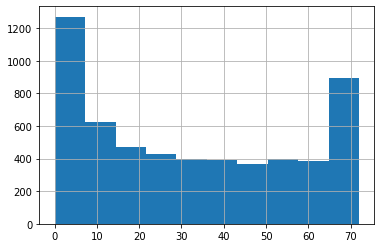

In [38]:
train_X["tenure"].hist();

In [39]:
std = StandardScaler()
scaled_fit = std.fit(train_X[num_col])

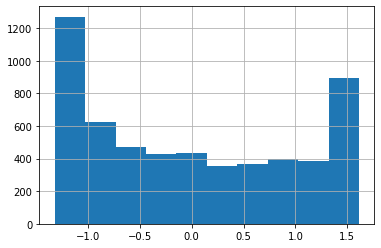

In [40]:
pd.DataFrame(scaled_fit.transform(train_X[num_col]), columns=num_col)["tenure"].hist();

In [41]:
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

Create dummy variables from categorical features, except for booleans


In [42]:
train_X["InternetService"].value_counts()

Fiber optic    2469
DSL            1946
No             1219
Name: InternetService, dtype: int64

In [43]:
pd.get_dummies(train_X["InternetService"], drop_first=True)

,Fiber optic,No
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
...,...,...
5629,1,0
5630,0,1
5631,0,0
5632,0,0


In [44]:
train_X = pd.get_dummies(data=train_X, 
               columns=[col for col in cat_cols if col not in bool_col],
               drop_first=True)

Preparing the boolean columns

In [45]:
train_X = train_X.assign(Female=np.where(train_X["gender"] == "Female", 1, 0))

In [46]:
train_X = train_X.drop(columns="gender")

In [47]:
bool_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [48]:
bool_col.pop(0)

'gender'

In [49]:
bool_col

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [50]:
train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].keys()]

,Partner,Dependents,PhoneService,PaperlessBilling
0,Yes,Yes,Yes,No
1,No,No,Yes,Yes
2,Yes,Yes,Yes,Yes
3,No,No,Yes,Yes
4,Yes,No,Yes,No
...,...,...,...,...
5629,No,No,Yes,No
5630,Yes,Yes,Yes,No
5631,Yes,Yes,Yes,Yes
5632,No,No,Yes,No


In [51]:
train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].
        keys()] = np.where(train_X[train_X[bool_col].dtypes[train_X[bool_col].dtypes == "object"].
                                   keys()] == "Yes", 1, 0)

In [52]:
train_X

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Female
0,0,1,1,1,0,0,0,0,0,0,0,0,72,19.95,1322.85,0,1,0,1,0,0,0,0
1,0,0,0,1,0,1,1,0,0,0,0,1,6,78.95,494.95,1,0,0,0,0,1,0,0
2,0,1,1,1,1,1,0,1,1,1,1,1,60,110.60,6586.85,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,1,45.85,45.85,0,0,0,0,0,0,1,0
4,1,1,0,1,1,0,0,0,0,0,0,0,28,25.70,734.60,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,0,0,1,0,0,0,1,0,1,0,0,15,85.30,1219.85,1,0,0,0,0,1,0,0
5630,0,1,1,1,0,0,0,0,0,0,0,0,56,20.05,1090.10,0,1,0,1,0,0,1,1
5631,0,1,1,1,0,1,1,1,0,0,0,1,33,58.45,1955.40,0,0,1,0,0,0,1,1
5632,0,0,0,1,1,1,0,0,0,0,1,0,17,65.75,1111.20,0,0,0,0,0,0,0,0


Doing the same preprocessing with test x but with a function

In [53]:
def preprocess(X, trained_standardization_factors):
    scaled_X = trained_standardization_factors.transform(X[num_col])
    scaled_X = pd.DataFrame(scaled_X, columns=num_col)
    
    X = X.drop(columns=num_col, axis=1)
    X = X.merge(scaled_X, left_index=True, right_index=True, how="inner")
    
    X = X.assign(Female=np.where(X["gender"] == "Female", 1, 0))
    X = X.drop(columns="gender")
    
    X[X[bool_col].dtypes[X[bool_col].dtypes == "object"].keys()] = np.where(X[X[bool_col].dtypes[X[bool_col].dtypes == "object"].keys()] == "Yes", 1, 0)
    
    new_cat_cols = [col for col in cat_cols if col != "gender"]
    X = pd.get_dummies(data=X,
                       columns=[col for col in new_cat_cols if col not in bool_col],
                       drop_first=True)
    
    return X

In [54]:
test_X = preprocess(test_X, scaled_fit)

In [55]:
test_X.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Female,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,1,1,0,1,0,0,0,0.065123,-0.071460,-0.003076,1,0,0,0,0,0,1,0
1,1,0,0,1,1,0,1,0,1,0,0,1,-0.586641,0.687074,-0.343603,1,1,0,0,0,0,1,0
2,0,0,0,1,1,0,0,1,0,1,1,0,-0.953258,1.114582,-0.601461,1,1,0,0,0,1,0,0
3,0,0,0,1,1,0,1,1,0,1,1,1,0.961298,1.397368,1.608455,1,1,0,1,0,0,1,0
4,0,1,0,1,1,0,0,1,1,1,1,1,0.391005,1.447272,1.020321,0,1,0,1,0,0,1,0


#### Train the model

In [56]:
train_y["Churn"] = np.where(train_y["Churn"] == "Yes", 1, 0)
test_y["Churn"] = np.where(test_y["Churn"] == "Yes", 1, 0)


In [57]:
train_y

,Churn
0,0
1,0
2,0
3,1
4,0
...,...
5629,0
5630,0
5631,0
5632,0


In [58]:
train_y["Churn"]

0       0
1       0
2       0
3       1
4       0
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: Churn, Length: 5634, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
# train model
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
lr.predict(test_X)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [62]:
test_y[:10]

,Churn
0,1
1,1
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [63]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
lr.predict_proba(test_X)[:10]

array([[0.8368967 , 0.1631033 ],
       [0.7410898 , 0.2589102 ],
       [0.67147841, 0.32852159],
       [0.83798707, 0.16201293],
       [0.91858818, 0.08141182],
       [0.51043331, 0.48956669],
       [0.64781711, 0.35218289],
       [0.75046683, 0.24953317],
       [0.8549721 , 0.1450279 ],
       [0.63056196, 0.36943804]])

#### Cross-validation of the model

In [65]:
def evaluate_model(train_X, train_y, test_X, test_y, model):
    ml_model = model
    ml_model.fit(train_X, train_y)
    
    predictions = ml_model.predict(test_X)
    acc = accuracy_score(test_y, predictions)
    
    print(f"Our model achieved an accuracy of {acc}")

In [66]:
evaluate_model(train_X, train_y, test_X, test_y, LogisticRegression())

Our model achieved an accuracy of 0.7274662881476224
